<a href="https://colab.research.google.com/github/IgorRamos099/airbnb-data-analysis/blob/main/analise_dados_airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importando as bibliotecas**

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Carregando os arquivos e realizando a primeira leitura**

In [3]:
listings = pd.read_csv('sample_data/listings_cleaned.csv')
reviews = pd.read_csv('sample_data/reviews.csv')

In [4]:
listings.head()

,id,neighbourhood_cleansed,room_type,accommodates,bathrooms,bedrooms,beds,price
0,271975,Vidigal,Entire home/apt,4,1.0,2.0,2.0,236.0
1,272335,Copacabana,Entire home/apt,4,1.0,1.0,1.0,723.0
2,272631,Copacabana,Private room,2,1.0,1.0,2.0,1146.0
3,273261,Leblon,Entire home/apt,6,3.5,3.0,3.0,6742.0
4,273363,Santa Teresa,Private room,1,1.0,1.0,1.0,61.0


In [5]:
reviews.head()

,id,number_of_reviews,review_scores_rating
0,272335,367,4.92
1,272631,32,5.00
2,273363,5,5.00
3,273463,654,4.83
4,273496,60,4.80


**Unindo os dois DataFrames em uma única base através do merge e verificando o resultado**

In [6]:
df = pd.merge(listings, reviews, on='id', how='inner')

In [7]:
df.head()

,id,neighbourhood_cleansed,room_type,accommodates,bathrooms,bedrooms,beds,price,number_of_reviews,review_scores_rating
0,272335,Copacabana,Entire home/apt,4,1.0,1.0,1.0,723.0,367,4.920000
1,272631,Copacabana,Private room,2,1.0,1.0,2.0,1146.0,32,5.000000
2,273261,Leblon,Entire home/apt,6,3.5,3.0,3.0,6742.0,0,4.812309
3,273363,Santa Teresa,Private room,1,1.0,1.0,1.0,61.0,5,5.000000
4,273463,Lagoa,Entire home/apt,6,2.0,2.0,6.0,1411.0,654,4.830000


In [14]:
df.shape

(32695, 10)

**Identificando valores ausentes**

In [15]:
df.isnull().sum()

,0
id,0
neighbourhood_cleansed,0
room_type,0
accommodates,0
bathrooms,0
bedrooms,0
beds,0
price,0
number_of_reviews,0
review_scores_rating,0


Não será necessário realizar o tratamento de valores null pois não temos.

**Tratando e Visualizando Outliers**

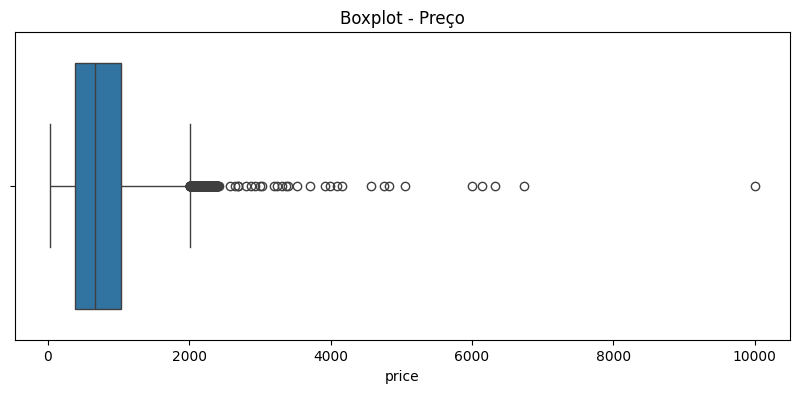

In [19]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['price'])
plt.title('Boxplot - Preço')
plt.show()


In [21]:
# Calculando IQR

Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1


In [22]:
# Definindo limites

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR


In [24]:
# Removendo valores outliers

df = df[
    (df['price'] >= limite_inferior) &
    (df['price'] <= limite_superior)
]


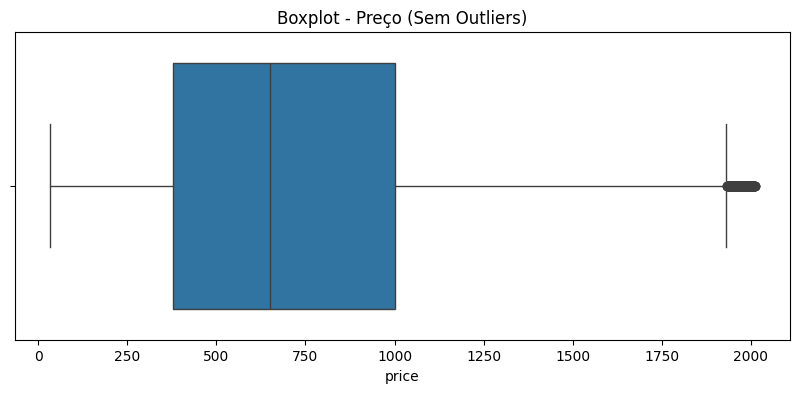

In [25]:
# Conferindo novamente após a tratativa

plt.figure(figsize=(10, 4))
sns.boxplot(x=df['price'])
plt.title('Boxplot - Preço (Sem Outliers)')
plt.show()


**Transformando Dados Categóricos**

In [26]:
# Identificando colunas categóricas

df.select_dtypes(include='object').columns


Index(['neighbourhood_cleansed', 'room_type'], dtype='object')

In [28]:
# Convertendo room_type para numérico

df['room_type_code'] = df['room_type'].astype('category').cat.codes

In [29]:
# Convertendo neighbourhood_cleansed

df['neighbourhood_code'] = df['neighbourhood_cleansed'].astype('category').cat.codes


In [30]:
# Removendo colunas categóricas originais

df = df.drop(columns=['room_type', 'neighbourhood_cleansed'])


**Extraindo o resultado final**

In [31]:
df.head()

,id,accommodates,bathrooms,bedrooms,beds,price,number_of_reviews,review_scores_rating,room_type_code,neighbourhood_code
0,272335,4,1.0,1.0,1.0,723.0,367,4.92,0,31
1,272631,2,1.0,1.0,2.0,1146.0,32,5.00,2,31
3,273363,1,1.0,1.0,1.0,61.0,5,5.00,2,120
4,273463,6,2.0,2.0,6.0,1411.0,654,4.83,0,74
5,273496,6,2.5,2.0,5.0,703.0,60,4.80,0,76


In [32]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 31772 entries, 0 to 32694
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    31772 non-null  int64  
 1   accommodates          31772 non-null  int64  
 2   bathrooms             31772 non-null  float64
 3   bedrooms              31772 non-null  float64
 4   beds                  31772 non-null  float64
 5   price                 31772 non-null  float64
 6   number_of_reviews     31772 non-null  int64  
 7   review_scores_rating  31772 non-null  float64
 8   room_type_code        31772 non-null  int8   
 9   neighbourhood_code    31772 non-null  int16  
dtypes: float64(5), int16(1), int64(3), int8(1)
memory usage: 2.3 MB
